In [108]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import hashlib


In [109]:

def Bloom_Filter(inp_filename, op_filename,n,prob_false_pos):
    lookup_count = 0  # will store the count of the number of lookups
    FP_count = 0  # will store the count of the number of False Positives

    # Create the bit array with the required size and fill them initially with 0.
    bit_arr_size = round(-(n * np.log(prob_false_pos)) / (np.square(np.log(2))))
    bloom_fltr = [0] * bit_arr_size

    hash_func_num= round((bit_arr_size/n)*np.log(2))
    
    if(hash_func_num==0 or bit_arr_size==0):
        print("Bloom filter cant work such configuration")
        return [bit_arr_size,hash_func_num]
    # Function to generate hash functions
    def filters_to_have():
        lst_fltr = []
        for i in range(hash_func_num):
            lst_fltr.append(char_val_sum % (bit_arr_size + i))
        return lst_fltr
    count =0
    with open(inp_filename, 'r') as file:
        my_reader = csv.reader(file, delimiter=',')
        next(file)
        for row in my_reader:
            count+=1
            word = row[0]
            char_val_sum = sum([ord(z) for z in list(word)])
            lst_fltr = filters_to_have()
            lst_fltr = [len(bloom_fltr) - 1 if i > len(bloom_fltr) - 1 else i for i in lst_fltr]

            sum_all = sum([bloom_fltr[i] == 0 for i in lst_fltr])
            if sum_all > 0:
                with open(op_filename, 'a', newline='') as csvfile:
                    spamwriter1 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
                    spamwriter1.writerow([word])
                for ij in lst_fltr:
                    bloom_fltr[ij] = 1
            else:
                lookup_count += 1
                cc = 0
                with open(op_filename, 'r') as file:
                    my_reader = csv.reader(file, delimiter=',')
                    next(file)
                    for row1 in my_reader:
                        word1 = row1[0]
                        if word == word1:
                            cc += 1
                if cc > 0:
                    pass
                else:
                    FP_count += 1
                    with open(op_filename, 'a', newline='') as csvfile:
                        spamwriter3 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
                        spamwriter3.writerow([word])
            if(count==n):
                print("Ending the process")
                break
    # print('Number of False Positives: ', FP_count)
    # print('Number of Lookup Count: ', lookup_count)
    print("For FPR = ",prob_false_pos," m = ",bit_arr_size," and k = ",hash_func_num," and n = ",n)
    return [bit_arr_size,hash_func_num]

In [110]:

# def Bloom_Filter(inp_filename, op_filename, n, prob_false_pos):
#     lookup_count = 0  # will store the count of the number of lookups
#     FP_count = 0  # will store the count of the number of False Positives

#     # Create the bit array with the required size and fill them initially with 0.
#     bit_arr_size = round(-(n * np.log(prob_false_pos)) / (np.square(np.log(2))))
#     bloom_fltr = [0] * bit_arr_size

#     hash_func_num = round((bit_arr_size / n) * np.log(2))

#     if hash_func_num == 0 or bit_arr_size == 0:
#         return [bit_arr_size, hash_func_num]

#     def complex_hash_function(data):
#         hasher = hashlib.sha256()
#         hasher.update(data.encode())
#         hash_value = hasher.hexdigest()
#         reversed_hash = hash_value[::-1]
#         return int(reversed_hash, 16)  # Convert the reversed hash to an integer

#     def filters_to_have(word, i):
#         return complex_hash_function(word) % bit_arr_size

#     with open(inp_filename, 'r') as file:
#         my_reader = csv.reader(file, delimiter=',')
#         next(file)
#         for row in my_reader:
#             word = row[0]
#             lst_fltr = [filters_to_have(word, i) for i in range(hash_func_num)]
            
#             sum_all = sum([bloom_fltr[i] == 0 for i in lst_fltr])
#             if sum_all > 0:
#                 with open(op_filename, 'a', newline='') as csvfile:
#                     spamwriter1 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#                     spamwriter1.writerow([word])
#                 for ij in lst_fltr:
#                     bloom_fltr[ij] = 1
#             else:
#                 lookup_count += 1
#                 cc = 0
#                 with open(op_filename, 'r') as file:
#                     my_reader = csv.reader(file, delimiter=',')
#                     next(file)
#                     for row1 in my_reader:
#                         word1 = row1[0]
#                         if word == word1:
#                             cc += 1
#                 if cc > 0:
#                     pass
#                 else:
#                     FP_count += 1
#                     with open(op_filename, 'a', newline='') as csvfile:
#                         spamwriter3 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#                         spamwriter3.writerow([word])

#     print("For FPR =", prob_false_pos, "m =", bit_arr_size, "and k =", hash_func_num)
#     return [bit_arr_size, hash_func_num]

In [111]:
def clear_file(file_path):
    with open(file_path, 'w', newline=''):
        pass  # This creates an empty file

In [112]:
# Experiment with different values of k and n
def findKandM(n,output_file,input_file):
    k_values = []
    fpr_values = []
    m_values = []
 
    for fpr in range(1, 11):
        target_false_positive_rate=fpr*0.1   
        clear_file(output_file)
        m,k = Bloom_Filter(input_file, output_file, n,target_false_positive_rate)
        print(m,k)
        k_values.append(k)
        m_values.append(m)
        fpr_values.append(target_false_positive_rate)
    return k_values,fpr_values,m_values

In [113]:
def findKandN(output_file,input_file):
    k_values = []
    n_values=[]
    m_values = []
    fpr_values = []
    for fpr in range(1,9):
        target_false_positive_rate=fpr*0.1   
        for n in range(10000,50000,10000):
            clear_file(output_file)
            m,k = Bloom_Filter(input_file, output_file, n,target_false_positive_rate)
            print(m,k)
            k_values.append(k)
            m_values.append(m)
            n_values.append(n)
            fpr_values.append(target_false_positive_rate)
    return k_values,n_values,m_values,fpr_values

In [114]:
# def generate_plots(k_values, m_values, false_positive_rates):
#     plt.figure(figsize=(12, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(false_positive_rates,k_values, marker='o')
#     plt.title('k vs False Positive Rate ')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('k (Number of Hash Functions)')

#     plt.subplot(1, 2, 2)
#     plt.plot(false_positive_rates,m_values, marker='o')
#     plt.title('m vs False Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('m (Size of the bit array)')

#     plt.tight_layout()
#     plt.show()

In [115]:
# # Call the experiment function
# output_file = 'word_drop.csv'
# input_file='stream.csv'
# n=10000
# k_values, false_positive_rates,m_values = findKandM(n,output_file,input_file)


In [116]:
# generate_plots(k_values, m_values, false_positive_rates)

In [117]:
output_file = 'word_drop.csv'
input_file='streaming_words.csv'
k_values, n_values,m_values,fpr_values = findKandN(output_file,input_file)

Ending the process
For FPR =  0.1  m =  47925  and k =  3  and n =  10000
47925 3
Ending the process
For FPR =  0.1  m =  95851  and k =  3  and n =  20000
95851 3
Ending the process
For FPR =  0.1  m =  143776  and k =  3  and n =  30000
143776 3
Ending the process
For FPR =  0.1  m =  191701  and k =  3  and n =  40000
191701 3
Ending the process
For FPR =  0.2  m =  33498  and k =  2  and n =  10000
33498 2
Ending the process
For FPR =  0.2  m =  66997  and k =  2  and n =  20000
66997 2
Ending the process
For FPR =  0.2  m =  100495  and k =  2  and n =  30000
100495 2
Ending the process
For FPR =  0.2  m =  133993  and k =  2  and n =  40000
133993 2
Ending the process
For FPR =  0.30000000000000004  m =  25059  and k =  2  and n =  10000
25059 2
Ending the process
For FPR =  0.30000000000000004  m =  50118  and k =  2  and n =  20000
50118 2
Ending the process
For FPR =  0.30000000000000004  m =  75177  and k =  2  and n =  30000
75177 2
Ending the process
For FPR =  0.3000000000

In [118]:
# def generate_plots(k_values, m_values, n_values):
#     plt.figure(figsize=(12, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(n_values,k_values, marker='o')
#     plt.title('k vs Number of rows written ')
#     plt.xlabel('Number of rows written')
#     plt.ylabel('k (Number of Hash Functions)')

#     plt.subplot(1, 2, 2)
#     plt.plot(n_values,m_values, marker='o')
#     plt.title('m vs Number of rows written')
#     plt.xlabel('Number of rows written')
#     plt.ylabel('m (Size of the bit array)')

#     plt.tight_layout()
#     plt.show()

In [119]:
# generate_plots(k_values, m_values, n_values)

In [120]:
k_values

[3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

In [121]:
m_values

[47925,
 95851,
 143776,
 191701,
 33498,
 66997,
 100495,
 133993,
 25059,
 50118,
 75177,
 100236,
 19071,
 38143,
 57214,
 76286,
 14427,
 28854,
 43281,
 57708,
 10632,
 21264,
 31896,
 42529,
 7424,
 14847,
 22271,
 29695,
 4644,
 9289,
 13933,
 18578]

In [122]:
n_values

[10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000,
 10000,
 20000,
 30000,
 40000]

In [123]:
fpr_values

[0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.4,
 0.4,
 0.4,
 0.4,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6000000000000001,
 0.6000000000000001,
 0.6000000000000001,
 0.6000000000000001,
 0.7000000000000001,
 0.7000000000000001,
 0.7000000000000001,
 0.7000000000000001,
 0.8,
 0.8,
 0.8,
 0.8]

In [124]:
import matplotlib.pyplot as plt

def generate_plots(k_values, m_values, n_values, fpr_values):
    num_fpr_values = len(set(fpr_values))

    plt.figure(figsize=(16, 8))
    
    for i, fpr in enumerate(set(fpr_values)):
        plt.subplot(num_fpr_values, 2, 2 * i + 1)
        n_values_for_fpr = [n_values[j] for j in range(len(fpr_values)) if fpr_values[j] == fpr]
        k_values_for_fpr = [k_values[j] for j in range(len(fpr_values)) if fpr_values[j] == fpr]
        plt.plot(n_values_for_fpr, k_values_for_fpr, marker='o')
        plt.title(f'n vs k (FPR = {fpr})')
        plt.xlabel('Number of rows written')
        plt.ylabel('k (Number of Hash Functions)')
        
        plt.subplot(num_fpr_values, 2, 2 * i + 2)
        m_values_for_fpr = [m_values[j] for j in range(len(fpr_values)) if fpr_values[j] == fpr]
        plt.plot(n_values_for_fpr, m_values_for_fpr, marker='o')
        plt.title(f'n vs m (FPR = {fpr})')
        plt.xlabel('Number of rows written')
        plt.ylabel('m (Size of the bit array)')

    plt.tight_layout()
    plt.show()


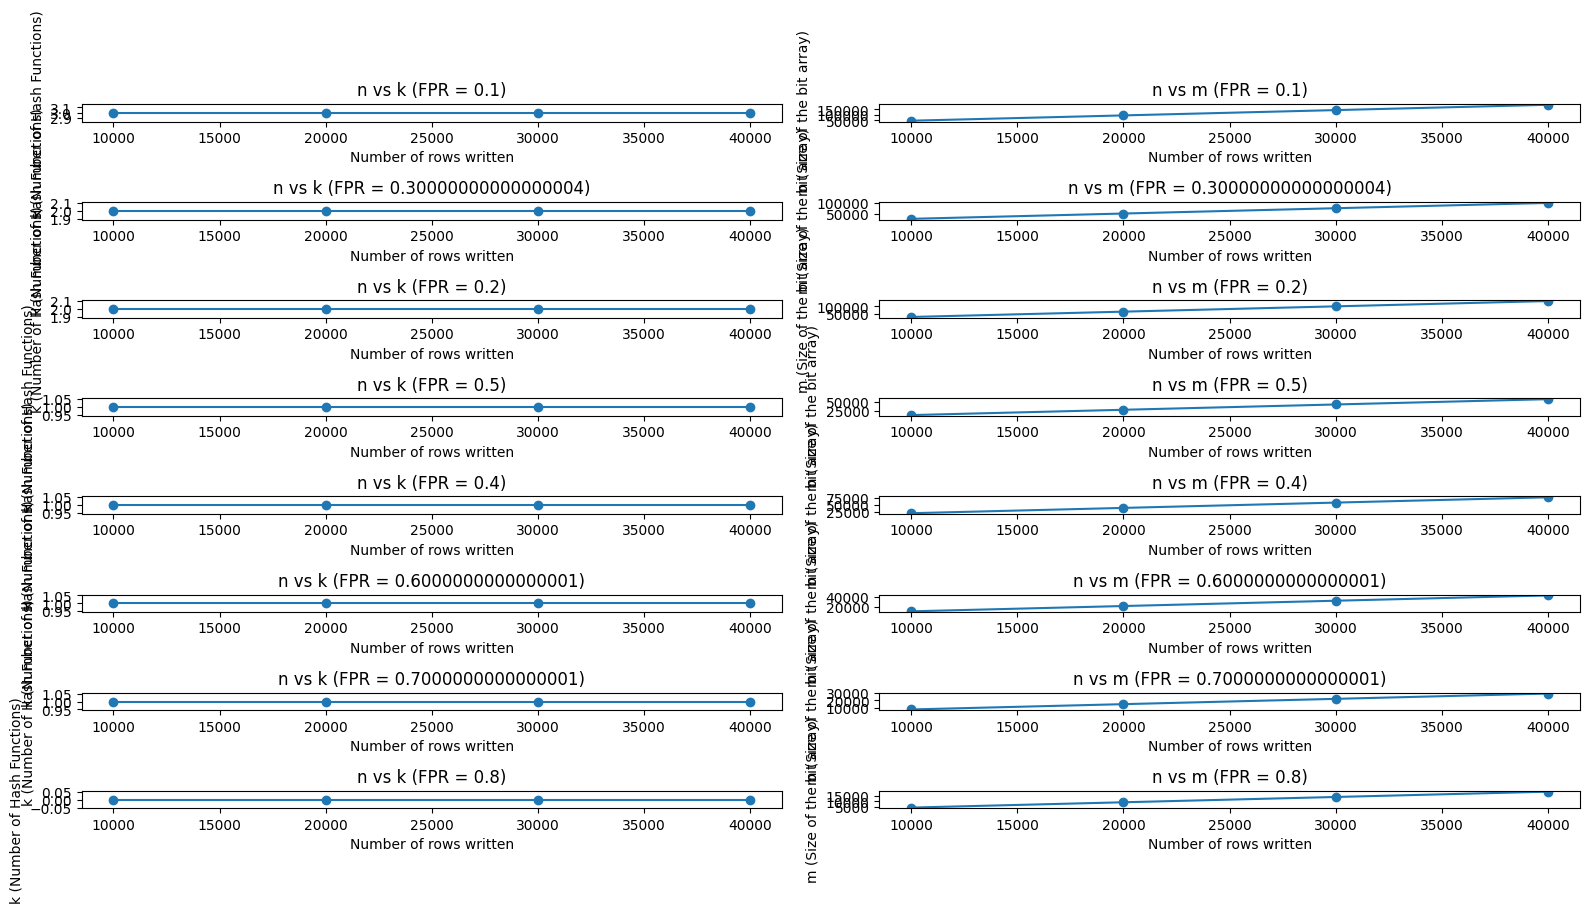

In [125]:
generate_plots(k_values, m_values, n_values, fpr_values)